<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/file%20skripsinya%20fara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [32]:
from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

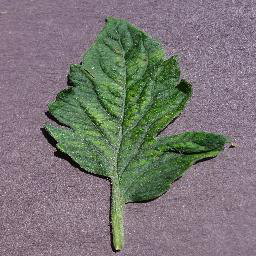

In [3]:
img = Image.open('/content/Tomato_Tomato_mosaic_virus15.jpg')
img

In [4]:
img.size

(256, 256)

In [5]:
img_array = np.array(img)
img_array

array([[[146, 127, 146],
        [140, 121, 140],
        [135, 116, 135],
        ...,
        [125, 110, 129],
        [160, 145, 164],
        [148, 133, 152]],

       [[140, 121, 140],
        [145, 126, 145],
        [147, 128, 147],
        ...,
        [118, 103, 122],
        [139, 124, 143],
        [140, 125, 144]],

       [[139, 120, 139],
        [135, 116, 135],
        [131, 112, 131],
        ...,
        [130, 115, 134],
        [146, 131, 150],
        [146, 131, 150]],

       ...,

       [[154, 134, 146],
        [116,  96, 108],
        [150, 130, 142],
        ...,
        [135, 117, 133],
        [134, 116, 132],
        [132, 114, 130]],

       [[118,  98, 110],
        [138, 118, 130],
        [135, 115, 127],
        ...,
        [129, 111, 127],
        [128, 110, 126],
        [128, 110, 126]],

       [[107,  87,  99],
        [119,  99, 111],
        [155, 135, 147],
        ...,
        [140, 122, 138],
        [141, 123, 139],
        [145, 127, 143]]

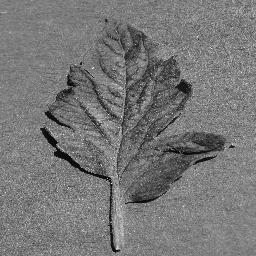

In [6]:
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
imgGray

In [7]:
imgG_array = np.array(imgGray)
imgG_array

array([[135, 129, 124, ..., 117, 152, 140],
       [129, 134, 136, ..., 110, 131, 132],
       [128, 124, 120, ..., 122, 138, 138],
       ...,
       [141, 103, 137, ..., 124, 123, 121],
       [105, 125, 122, ..., 118, 117, 117],
       [ 94, 106, 142, ..., 129, 130, 134]], dtype=uint8)

In [8]:
np.min(imgG_array),np.max(imgG_array)

(0, 247)

## FIS (Fuzzy Information System)

In [9]:
def fungsi_linier(x):
  a = 0;
  b = 247;
  miu = (x - a)/(b-a)
  return miu

In [10]:
img_fuzzy = fungsi_linier(imgG_array)
img_fuzzy

array([[0.5465587 , 0.52226721, 0.50202429, ..., 0.47368421, 0.61538462,
        0.56680162],
       [0.52226721, 0.54251012, 0.55060729, ..., 0.44534413, 0.53036437,
        0.53441296],
       [0.51821862, 0.50202429, 0.48582996, ..., 0.49392713, 0.55870445,
        0.55870445],
       ...,
       [0.5708502 , 0.41700405, 0.55465587, ..., 0.50202429, 0.49797571,
        0.48987854],
       [0.42510121, 0.50607287, 0.49392713, ..., 0.47773279, 0.47368421,
        0.47368421],
       [0.3805668 , 0.4291498 , 0.57489879, ..., 0.52226721, 0.52631579,
        0.54251012]])

In [11]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

In [66]:
FEM = entropi(img_fuzzy)
FEM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


array([[0.47635413, 0.48943748, 0.49909795, ..., 0.51063277, 0.43103983,
        0.46425826],
       [0.48943748, 0.47864477, 0.47402023, ..., 0.51971995, 0.48525382,
        0.48309494],
       [0.49146156, 0.49909795, 0.50598055, ..., 0.50263501, 0.4692239 ,
        0.4692239 ],
       ...,
       [0.46171271, 0.52620352, 0.47164338, ..., 0.49909795, 0.50089022,
        0.50433192],
       [0.52462664, 0.49725858, 0.50263501, ..., 0.50913139, 0.51063277,
        0.51063277],
       [0.53042578, 0.52375449, 0.45912573, ..., 0.48943748, 0.48736812,
        0.47864477]])

In [39]:
FEM.shape, FEM.dtype

((256, 256), dtype('float64'))

In [48]:
img = Image.fromarray( FEM , 'RGB')
img.show()

In [49]:
np.array(img)

array([[[197, 232, 208],
        [ 10, 150, 124],
        [222,  63, 203],
        ...,
        [ 63, 100, 130],
        [ 67,  49,  27],
        [116, 223,  63]],

       [[205, 248,  62],
        [ 25, 110, 223],
        [221,  63,  78],
        ...,
        [ 63,   2, 176],
        [210, 175, 124],
        [ 35, 224,  63]],

       [[105, 188, 187],
        [116, 238, 198],
        [222,  63, 105],
        ...,
        [ 63, 203, 122],
        [191, 145, 241],
        [ 82, 223,  63]],

       ...,

       [[ 58, 114, 106],
        [ 27, 226, 234],
        [224,  63, 210],
        ...,
        [ 63,  79,   5],
        [ 95, 239,  74],
        [  7, 224,  63]],

       [[161,  26, 172],
        [102,   5, 235],
        [224,  63, 124],
        ...,
        [ 63, 164, 115],
        [ 20, 145,  49],
        [225, 224,  63]],

       [[101, 150,  25],
        [198, 168, 214],
        [224,  63, 203],
        ...,
        [ 63, 197, 232],
        [208,  10, 150],
        [124, 222,  63]]

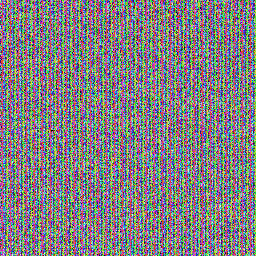

In [50]:
img

# K-Means Klastering

In [13]:
k = 3              # jumlah klaster
maks_iter = 1000   # maksimum iterasi
toleransi = 0.0001 #batas toleransi
print(k)
print(maks_iter)
print(toleransi)

3
1000
0.0001


In [14]:
import random
def pusat_klaster_awal(k, data):
    X=np.array(data)
    n=len(X)
    list_1=np.arange(0,n)
    pusat_klaster_index = random.choices(list_1, k=k)
    pusat_klaster=np.array(X[pusat_klaster_index])
    return pusat_klaster

In [18]:
pusat_klaster = np.array([0.,  85., 170.])
#pusat_klaster = np.array([  0., 180.])
#pusat_klaster = pusat_klaster_awal(k,Data)
pusat_klaster 

array([  0.,  85., 170.])

In [19]:
def jarak_euclidean(x,y):
    return np.sqrt(pow(x-y, 2))

In [20]:
def jarak_centroid2(X,pusat_klaster):
    n=len(X)
    k=np.array(pusat_klaster)
    jarak=[]
    x = list(X)
    for j in range(len(k)):
      jrk = [jarak_euclidean(X, pusat_klaster[j])]
      jarak.append(jrk)
    return np.array(jarak)

In [21]:
jarak_centroid = jarak_centroid2(FEM,pusat_klaster)
jarak_centroid

array([[[[  0.47635413,   0.48943748,   0.49909795, ...,   0.51063277,
            0.43103983,   0.46425826],
         [  0.48943748,   0.47864477,   0.47402023, ...,   0.51971995,
            0.48525382,   0.48309494],
         [  0.49146156,   0.49909795,   0.50598055, ...,   0.50263501,
            0.4692239 ,   0.4692239 ],
         ...,
         [  0.46171271,   0.52620352,   0.47164338, ...,   0.49909795,
            0.50089022,   0.50433192],
         [  0.52462664,   0.49725858,   0.50263501, ...,   0.50913139,
            0.51063277,   0.51063277],
         [  0.53042578,   0.52375449,   0.45912573, ...,   0.48943748,
            0.48736812,   0.47864477]]],


       [[[ 84.52364587,  84.51056252,  84.50090205, ...,  84.48936723,
           84.56896017,  84.53574174],
         [ 84.51056252,  84.52135523,  84.52597977, ...,  84.48028005,
           84.51474618,  84.51690506],
         [ 84.50853844,  84.50090205,  84.49401945, ...,  84.49736499,
           84.5307761 ,  84.530

In [29]:
jarak_centroid = np.transpose(jarak_centroid)
jarak_centroid

array([[[[  0.47635413,  84.52364587, 169.52364587]],

        [[  0.48943748,  84.51056252, 169.51056252]],

        [[  0.49146156,  84.50853844, 169.50853844]],

        ...,

        [[  0.46171271,  84.53828729, 169.53828729]],

        [[  0.52462664,  84.47537336, 169.47537336]],

        [[  0.53042578,  84.46957422, 169.46957422]]],


       [[[  0.48943748,  84.51056252, 169.51056252]],

        [[  0.47864477,  84.52135523, 169.52135523]],

        [[  0.49909795,  84.50090205, 169.50090205]],

        ...,

        [[  0.52620352,  84.47379648, 169.47379648]],

        [[  0.49725858,  84.50274142, 169.50274142]],

        [[  0.52375449,  84.47624551, 169.47624551]]],


       [[[  0.49909795,  84.50090205, 169.50090205]],

        [[  0.47402023,  84.52597977, 169.52597977]],

        [[  0.50598055,  84.49401945, 169.49401945]],

        ...,

        [[  0.47164338,  84.52835662, 169.52835662]],

        [[  0.50263501,  84.49736499, 169.49736499]],

        [[  0.45912

In [30]:
def menentukan_klaster(jarak_centroid):
    n=len(jarak_centroid)
    minimum_jarak = []
    label_klaster=list()
    for i in range(n):
        max_val, idx = min((val, idx) for (idx, val) in enumerate(jarak_centroid[i]))
        label_klaster.append(idx)
        minimum_jarak.append(max_val)
    return label_klaster

In [31]:
klaster = menentukan_klaster(jarak_centroid)
klaster

ValueError: ignored

In [26]:
def min_jarak(jarak_centroid):
    n = len(jarak_centroid)
    minimum_jarak = []
    label_klaster =list()
    for i in range(n):
        max_val, idx = min((val, idx) for (idx, val) in enumerate(jarak_centroid[i]))
        label_klaster.append(idx)
        minimum_jarak.append(max_val)
    return minimum_jarak

In [28]:
jarak_min = min_jarak(jarak_centroid)
jarak_min

[array([[0.47635413, 0.48943748, 0.49909795, ..., 0.51063277, 0.43103983,
         0.46425826],
        [0.48943748, 0.47864477, 0.47402023, ..., 0.51971995, 0.48525382,
         0.48309494],
        [0.49146156, 0.49909795, 0.50598055, ..., 0.50263501, 0.4692239 ,
         0.4692239 ],
        ...,
        [0.46171271, 0.52620352, 0.47164338, ..., 0.49909795, 0.50089022,
         0.50433192],
        [0.52462664, 0.49725858, 0.50263501, ..., 0.50913139, 0.51063277,
         0.51063277],
        [0.53042578, 0.52375449, 0.45912573, ..., 0.48943748, 0.48736812,
         0.47864477]]),
 array([[84.52364587, 84.51056252, 84.50090205, ..., 84.48936723,
         84.56896017, 84.53574174],
        [84.51056252, 84.52135523, 84.52597977, ..., 84.48028005,
         84.51474618, 84.51690506],
        [84.50853844, 84.50090205, 84.49401945, ..., 84.49736499,
         84.5307761 , 84.5307761 ],
        ...,
        [84.53828729, 84.47379648, 84.52835662, ..., 84.50090205,
         84.49910978, 84

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state=123)

In [ ]:
# back convert data into integer 8-bit values

center = np.uint8(center)
center

array([[0, 0],
       [0, 0]], dtype=uint8)

In [ ]:
segmented_data = center[label.flatten()]
segmented_data

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=uint8)

In [ ]:
segmented_image = segmented_data.reshape((im.shape))
segmented_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

# Evaluasi Performa

In [ ]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/Tomato_Tomato_mosaic_virus15.jpg")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

PSNR value is 28.57453486540049 dB
